In [1]:
# Initial imports
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

2021-08-19 00:18:08.377545: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-19 00:18:08.377689: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('/work/Fintech-Project2/STRATEGY NOTEBOOKS/Combination Hourly-Daily Strategy/SQ Signals and Binary Return for TrainTest.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head()

,macd_signal,rsi_signal,aroon_signal,Binary Return
0,0,0,0,0
1,-1,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [3]:
X = df.copy()
X = X.drop(columns = ['Binary Return'])
X.head()

,macd_signal,rsi_signal,aroon_signal
0,0,0,0
1,-1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [4]:
y = df['Binary Return'].values
y = y.reshape(-1,1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
X_scaler = StandardScaler()
X_scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
number_inputs = 3
number_hidden_nodes_layer1 = 21
number_hidden_nodes_layer2 = 42

nn = Sequential()
nn.add(Dense(units = number_hidden_nodes_layer1, input_dim = number_inputs, activation = 'relu'))
nn.add(Dense(units = number_hidden_nodes_layer2, activation = 'relu' ))
nn.add(Dense(1, activation = 'sigmoid'))

2021-08-19 00:18:15.756886: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-19 00:18:15.757140: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-19 00:18:15.757156: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-19 00:18:15.757182: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-d12c285c-6789-4c45-9ad7-1be9b4d60622): /proc/driver/nvidia/version does not exist
2021-08-19 00:18:15.757446: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebu

In [8]:
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [9]:
model = nn.fit(X_train_scaled, y_train, epochs = 100)

2021-08-19 00:18:15.883306: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-19 00:18:15.902813: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199970000 Hz
Epoch 1/100
80/80 [==============================] - 1s 1ms/step - loss: 0.6918 - accuracy: 0.5079
Epoch 2/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5192
Epoch 3/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6896 - accuracy: 0.5391
Epoch 4/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6903 - accuracy: 0.5287
Epoch 5/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6937 - accuracy: 0.5064
Epoch 6/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6940 - accuracy: 0.5062
Epoch 7/100
80/80 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5185
Epoch 8/100
80/80 [================

<AxesSubplot:>

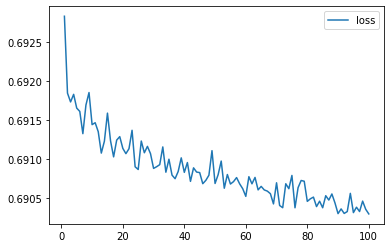

In [10]:
df_plot = pd.DataFrame(model.history, index = range(1, len(model.history['loss'])+ 1))

df_plot.plot(y='loss')

<AxesSubplot:>

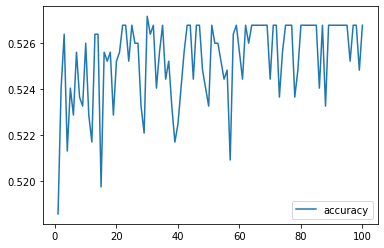

In [11]:
df_plot.plot(y='accuracy')

In [12]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose = 2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

27/27 - 0s - loss: 0.6951 - accuracy: 0.5029
Loss: 0.6951295137405396, Accuracy: 0.5029308199882507


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d12c285c-6789-4c45-9ad7-1be9b4d60622' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>